In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib


In [7]:
df = sns.load_dataset("titanic")
print(df.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [10]:
df = sns.load_dataset("titanic")
# Drop columns not useful for prediction
df = df.drop(columns=["alive", "class", "who", "adult_male", "deck", "embark_town"])

# Fill missing values
df["age"] = df["age"].fillna(df["age"].median())
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])

# One-hot encode categorical features
df = pd.get_dummies(df, drop_first=True)

print(df.columns)

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'alone',
       'sex_male', 'embarked_Q', 'embarked_S'],
      dtype='object')


/tmp/ipython-input-1848176521.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(), inplace=True)
/tmp/ipython-input-1848176521.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [12]:
X = df.drop("survived", axis=1)
y = df["survived"]


In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [18]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC()
}


In [20]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred),
        "Recall": recall_score(y_test, y_test_pred),
        "F1 Score": f1_score(y_test, y_test_pred)
    })


In [22]:
comparison_df = pd.DataFrame(results)
comparison_df["Overfitting Gap"] = (
    comparison_df["Train Accuracy"] - comparison_df["Test Accuracy"]
)

print(comparison_df)


                 Model  Train Accuracy  Test Accuracy  Precision    Recall  \
0  Logistic Regression        0.800562       0.804469   0.783333  0.681159   
1        Decision Tree        0.981742       0.815642   0.781250  0.724638   
2        Random Forest        0.981742       0.815642   0.790323  0.710145   
3                  SVM        0.846910       0.810056   0.818182  0.652174   

   F1 Score  Overfitting Gap  
0  0.728682        -0.003907  
1  0.751880         0.166099  
2  0.748092         0.166099  
3  0.725806         0.036854  


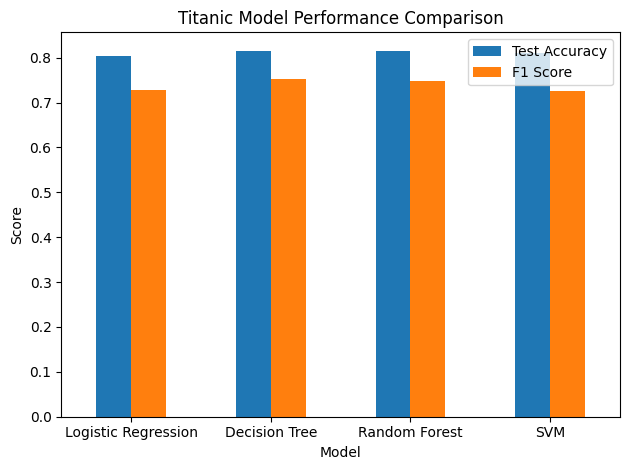

In [24]:
comparison_df.set_index("Model")[["Test Accuracy", "F1 Score"]].plot(kind="bar")
plt.title("Titanic Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [25]:
best_model = models["Random Forest"]
joblib.dump(best_model, "best_titanic_model.pkl")


['best_titanic_model.pkl']